In [133]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read images

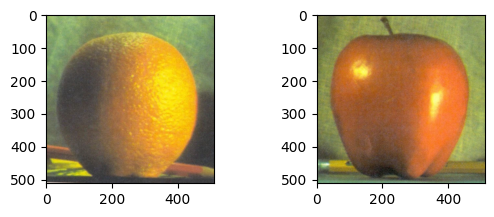

In [134]:
fig = plt.figure()

orange = cv2.imread("../../images/orange.webp")
o = fig.add_subplot(2,2,1)
o.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))

apple = cv2.imread("../../images/apple.jpg")
a = fig.add_subplot(2,2,2)
a.imshow(cv2.cvtColor(apple, cv2.COLOR_BGR2RGB))

### Downsample // Upsample

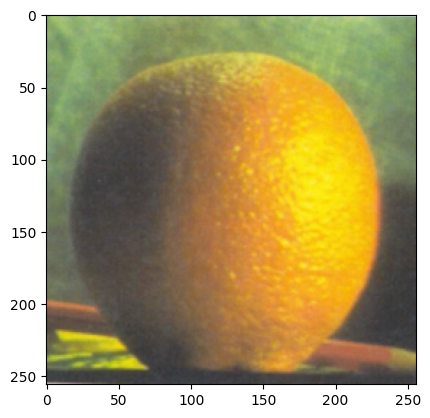

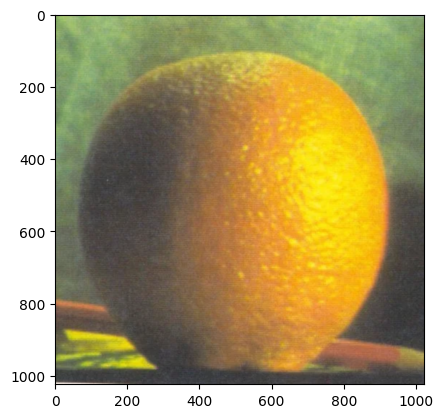

In [135]:
def downsample(img):
    return cv2.pyrDown(img)
def upsample(img):
    return cv2.pyrUp(img)

little = downsample(orange)
plt.imshow(cv2.cvtColor(little, cv2.COLOR_BGR2RGB))
plt.show()


big = upsample(orange)
plt.imshow(cv2.cvtColor(big, cv2.COLOR_BGR2RGB))
plt.show()

# Main Code

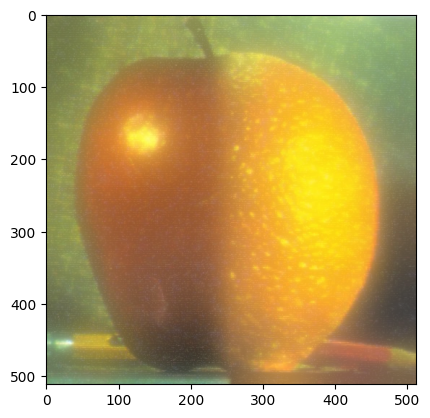

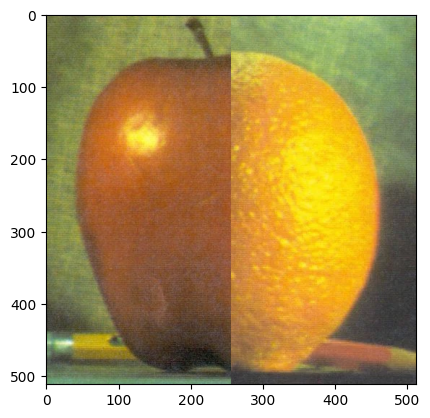

In [136]:
nPy = 6

real = np.hstack((apple[:,:apple.shape[1]//2],orange[:,orange.shape[1]//2:]))

''' Gaussian Pyramid'''
# Gaussian Pyramid Apple
applecopy = apple.copy()
aGauss = [applecopy]
for i in range(nPy):
    applecopy = cv2.pyrDown(applecopy)
    aGauss.append(applecopy)
# Gaussian Pyramid Orange
orangecopy = orange.copy()
oGauss = [orangecopy]
for i in range(nPy):
    orangecopy = cv2.pyrDown(orangecopy)
    oGauss.append(orangecopy)


''' Laplace Pyramid'''
# Laplace Pyramid Apple
applecopy = aGauss[nPy-1]
aLapl = [applecopy]
for i in range(nPy-1, 0, -1):
    size = (aGauss[i - 1].shape[1], aGauss[i - 1].shape[0])
    appleUP = cv2.pyrUp(aGauss[i], dstsize=size)
    laplacian = cv2.subtract(aGauss[i-1], appleUP)
    aLapl.append(laplacian)

# Laplace Pyramid Orange
orangecopy = oGauss[nPy-1]
oLapl = [orangecopy]
for i in range(nPy-1, 0, -1):
    size = (oGauss[i - 1].shape[1], oGauss[i - 1].shape[0])
    orangeUP = cv2.pyrUp(oGauss[i], dstsize=size)
    laplacian = cv2.subtract(oGauss[i-1], orangeUP)
    oLapl.append(laplacian)


# Join both halves
apple_orange_py = []
n = 0
for apple_lap, orange_lap in zip(aLapl, oLapl):
    n+=1
    cols, rows, ch = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, :rows//2], orange_lap[:, rows//2:]))
    apple_orange_py.append(laplacian)




# Reconstruct image
apple_orange_reconstruct = apple_orange_py[0]
for i in range(1, nPy):
    size = (apple_orange_py[i].shape[1], apple_orange_py[i].shape[0])
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct, dstsize=size)
    apple_orange_reconstruct = cv2.add(apple_orange_py[i], apple_orange_reconstruct)

# image with direct connecting each half

plt.imshow(cv2.cvtColor(apple_orange_reconstruct, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(real, cv2.COLOR_BGR2RGB))
plt.show()

